# Pandas IO

## Criando os nomes

In [1]:
import pandas as pd # noqa E402

In [2]:
# Se precisar recriar as listas no de nomes, descomente o código abaixo
# e execute.

# nomes = pd.read_csv('../data/nomes.csv')
# nomes.head(10)

# selecao_m = nomes['classification'] == 'M'
# nomes_masculinos = nomes[selecao_m][['first_name']]
# nomes_masculinos.reset_index(drop=True, inplace=True)
# nomes_masculinos.rename(columns={'first_name': 'nome'}, inplace=True)
# nomes_masculinos['nome'] = nomes_masculinos['nome'].str.capitalize()
# nomes_masculinos.to_csv('../data/nomes_m.csv', index=False)

# selecao_f = nomes['classification'] == 'F'
# nomes_femininos = nomes[selecao_f][['first_name']]
# nomes_femininos.reset_index(drop=True, inplace=True)
# nomes_femininos.rename(columns={'first_name': 'nome'}, inplace=True)
# nomes_femininos['nome'] = nomes_femininos['nome'].str.capitalize()
# nomes_femininos.to_csv('../data/nomes_f.csv', index=False)

In [3]:
# nomes_m = pd.read_json(
#     'https://servicodados.ibge.gov.br/api/v1/censos/nomes/'
#     + 'ranking?qtd=200&sexo=m'
# )

# Quando o serviço acima estiver indisponível, use o código abaixo:
nomes_m = pd.read_csv('../data/nomes_m.csv')
nomes_m = nomes_m.sample(200)
nomes_m.reset_index(drop=True, inplace=True)

# nomes_f = pd.read_json(
#     'https://servicodados.ibge.gov.br/api/v1/censos/nomes/'
#     + 'ranking?qtd=200&sexo=f'
# )

# Quando o serviço acima estiver indisponível, use o código abaixo:
nomes_f = pd.read_csv('../data/nomes_f.csv')
nomes_f = nomes_f.sample(200)
nomes_f.reset_index(drop=True, inplace=True)

In [4]:
nomes_m.head(10)

,nome
0,Bazilho
1,Heliosmar
2,Edwino
3,Demivaldo
4,Anderlei
5,Edjonas
6,Kennyo
7,Geocimar
8,Sueleno
9,Cidivaldo


In [5]:
nomes_f.head(10)

,nome
0,Dagmar
1,Neidevan
2,Mismana
3,Nadyja
4,Geyssiane
5,Mirles
6,Jenova
7,Rosislaine
8,Teomira
9,Kaenne


In [6]:
print(f'Quantidade de nomes: {len(nomes_m) + len(nomes_f)}')

Quantidade de nomes: 400


In [7]:
frames = [nomes_m.sample(200), nomes_f.sample(200)]

In [8]:
type(pd.concat(frames)['nome'])

pandas.core.series.Series

In [9]:
nomes = pd.concat(frames)['nome'].to_frame()

In [10]:
nomes

,nome
113,Mirrai
148,Diecson
161,Raf
146,Matthew
69,Alpheu
...,...
79,Franciellen
69,Katharyna
141,Gisleyne
31,Greiciane


In [11]:
nomes = nomes.sample(nomes.shape[0])
nomes.reset_index(drop=True, inplace=True)
nomes

,nome
0,Pereira
1,Gerssica
2,Salvenir
3,Franklim
4,Cantuario
...,...
395,Willani
396,Cleunides
397,Nadyja
398,Idelicia


## incluindo ID dos alunos

In [12]:
import numpy as np # noqa E402
np.random.seed(123)

In [13]:
total_alunos = nomes.shape[0]
total_alunos

400

In [14]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [15]:
nomes.sample(5)

,nome,id_aluno
188,Tonys,369
57,Rais,303
203,Jemesson,382
382,Radiel,33
230,Suzymara,111


In [16]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [17]:
nomes

,nome,id_aluno,dominio
0,Pereira,235,@dominiodoemail.com.br
1,Gerssica,43,@servicodoemail.com
2,Salvenir,304,@servicodoemail.com
3,Franklim,156,@dominiodoemail.com.br
4,Cantuario,343,@servicodoemail.com
...,...,...,...
395,Willani,231,@dominiodoemail.com.br
396,Cleunides,99,@servicodoemail.com
397,Nadyja,323,@dominiodoemail.com.br
398,Idelicia,383,@dominiodoemail.com.br


In [18]:
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()
nomes

,nome,id_aluno,dominio,email
0,Pereira,235,@dominiodoemail.com.br,pereira@dominiodoemail.com.br
1,Gerssica,43,@servicodoemail.com,gerssica@servicodoemail.com
2,Salvenir,304,@servicodoemail.com,salvenir@servicodoemail.com
3,Franklim,156,@dominiodoemail.com.br,franklim@dominiodoemail.com.br
4,Cantuario,343,@servicodoemail.com,cantuario@servicodoemail.com
...,...,...,...,...
395,Willani,231,@dominiodoemail.com.br,willani@dominiodoemail.com.br
396,Cleunides,99,@servicodoemail.com,cleunides@servicodoemail.com
397,Nadyja,323,@dominiodoemail.com.br,nadyja@dominiodoemail.com.br
398,Idelicia,383,@dominiodoemail.com.br,idelicia@dominiodoemail.com.br


In [19]:
type(np.random)

module

## Criando a tabela de Cursos

In [20]:
import html5lib # noqa E402

In [21]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

# se o serviço acima estiver indisponível, use o código abaixo:
# cursos = [pd.read_csv('../data/cursos.csv')]

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [22]:
# O tipo retornado por read_html é um lista de DataFrames
type(cursos)

list

In [23]:
len(cursos)

1

In [24]:
cursos = cursos[0]

In [25]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [26]:
type(cursos)

pandas.core.frame.DataFrame

In [27]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index de cursos

In [28]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [29]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [30]:
cursos['id'] = cursos.index + 1

In [31]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [32]:
cursos.set_index('id', inplace=True)

In [33]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando os alunos nos cursos

In [34]:
# nomes['matriculas'] = np.ceil(
#     np.random.exponential(size=total_alunos) * 1.5
# ).astype(int)

nomes['matriculas'] = np.ceil(
    np.random.exponential(size=total_alunos) * 1.5
).astype(int)

In [35]:
nomes.sample(20)

,nome,id_aluno,dominio,email,matriculas
193,Altevo,146,@dominiodoemail.com.br,altevo@dominiodoemail.com.br,2
387,Wandson,97,@dominiodoemail.com.br,wandson@dominiodoemail.com.br,2
232,Homerinda,322,@dominiodoemail.com.br,homerinda@dominiodoemail.com.br,2
313,Darismar,260,@servicodoemail.com,darismar@servicodoemail.com,2
199,Idelmario,35,@dominiodoemail.com.br,idelmario@dominiodoemail.com.br,1
16,Onisio,191,@servicodoemail.com,onisio@servicodoemail.com,1
231,Mirles,336,@servicodoemail.com,mirles@servicodoemail.com,1
135,Rozelio,387,@servicodoemail.com,rozelio@servicodoemail.com,3
364,Idorilda,136,@dominiodoemail.com.br,idorilda@dominiodoemail.com.br,1
181,Enileia,168,@dominiodoemail.com.br,enileia@dominiodoemail.com.br,2


In [36]:
nomes.matriculas.describe()

count    400.000000
mean       2.120000
std        1.498738
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [37]:
import seaborn as sns # noqa E402

E:\repositorios\alura\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

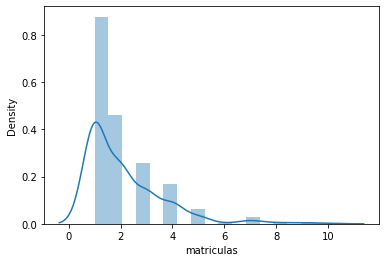

In [38]:
sns.distplot(nomes.matriculas)

In [39]:
nomes.matriculas.value_counts()

1     186
2      98
3      55
4      36
5      13
7       6
8       2
9       2
6       1
10      1
Name: matriculas, dtype: int64

In [40]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,Silves,277,@servicodoemail.com,silves@servicodoemail.com,2
264,Cana,290,@dominiodoemail.com.br,cana@dominiodoemail.com.br,4
213,Wellian,195,@servicodoemail.com,wellian@servicodoemail.com,3
298,Luzineide,134,@dominiodoemail.com.br,luzineide@dominiodoemail.com.br,7
33,Naelton,192,@dominiodoemail.com.br,naelton@dominiodoemail.com.br,1


## Selecionando cursos

In [41]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
223,Diorlan,321,@dominiodoemail.com.br,diorlan@dominiodoemail.com.br,3
169,Jelsson,394,@dominiodoemail.com.br,jelsson@dominiodoemail.com.br,2
348,Lameque,332,@dominiodoemail.com.br,lameque@dominiodoemail.com.br,1


In [42]:
todas_matriculas = []
x = np.random.rand(20)
x

array([0.05751192, 0.13358039, 0.24285535, 0.25264449, 0.19218292,
       0.70825561, 0.6694799 , 0.61311796, 0.48222108, 0.25268323,
       0.19443853, 0.44236406, 0.9780213 , 0.87160349, 0.6274891 ,
       0.69694288, 0.13029884, 0.97271443, 0.11347265, 0.15979268])

In [43]:
prob = x / sum(x)
prob

array([0.00654164, 0.01519397, 0.02762334, 0.0287368 , 0.02185966,
       0.08055984, 0.07614934, 0.0697385 , 0.05484976, 0.02874121,
       0.02211622, 0.05031627, 0.11124408, 0.09913969, 0.07137313,
       0.07927309, 0.01482071, 0.11064045, 0.01290684, 0.01817546])

In [44]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])


In [45]:
matriculas.head(10)

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,43,18
4,43,17
5,43,15
6,304,16
7,156,13
8,156,6
9,156,13


In [46]:
nomes[nomes['id_aluno'] == 156]

,nome,id_aluno,dominio,email,matriculas
3,Franklim,156,@dominiodoemail.com.br,franklim@dominiodoemail.com.br,5


In [47]:
matriculas_por_curso = (
    matriculas.groupby('id_curso')
    .count()
    .join(cursos['nome_do_curso'])
    .rename(columns={'id_aluno': 'quantidade_de_alunos'})
    .sort_values('id_curso', ascending=True)
)
matriculas_por_curso = matriculas_por_curso[
    ['nome_do_curso', 'quantidade_de_alunos']
]
matriculas_por_curso

,nome_do_curso,quantidade_de_alunos
id_curso,,
1,Lógica de programação,3
2,Java para Web,8
3,C# para Web,22
4,Ruby on Rails,23
5,Cursos de Python,21
6,PHP com MySql,67
7,.NET para web,64
8,Novas integrações com Java,56
9,TDD com Java,49


In [48]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
363,Dangelis,362,@servicodoemail.com,dangelis@servicodoemail.com,1
82,Loti,7,@dominiodoemail.com.br,loti@dominiodoemail.com.br,3
146,Valdize,352,@servicodoemail.com,valdize@servicodoemail.com,1


In [49]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [50]:
matriculas.sample(5)

,id_aluno,id_curso
42,200,11
96,241,13
139,278,5
299,36,7
239,31,5


In [51]:
matriculas_por_curso.sample(5)

,nome_do_curso,quantidade_de_alunos
id_curso,,
17,Internet das coisas,9
15,Análise de dados,63
4,Ruby on Rails,23
14,Desenvolvendo jogos,80
7,.NET para web,64
